In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

res = smf.ols("y ~ x1+x2+x3+x4+x5+x6+x7+x8+x9+x10", data=trainset).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.749e+32
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:54:27   Log-Likelihood:             2.7369e+05
No. Observations:               10000   AIC:                        -5.474e+05
Df Residuals:                    9989   BIC:                        -5.473e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.99e-13   3.15e-15    -63.230      0.000   -2.05e-13   -1.93e-13
x1             0.1000   3.15e-18   3.17e+16      0.000       0.100       0.100
x2             0.1000   3.15e-18   3.18e+16      0.000       0.100       0.100
x3             0.1000   3.14e-18   3.19e+16      0.000       0.100       0.100
x4             0.1000   3.15e-18   3.18e+16      0.000       0.100       0.100
x5             0.1000   3.17e-18   3.15e+16      0.000       0.100       0.100
x6             0.1000   3.16e-18   3.17e+16      0.000       0.100       0.100
x7             0.1000   3.11e-18   3.21e+16      0.000       0.100       0.100
x8             0.1000   3.19e-18   3.14e+16      0.000       0.100       0.100
x9             0.1000   3.17e-18   3.15e+16      0.000       0.100       0.100
x10            0.1000   3.17e-18   3.15e+16      0.000       0.100       0.100
==============================================================================
Omnibus:                        1.737   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.420   Jarque-Bera (JB):                1.721
Skew:                          -0.007   Prob(JB):                        0.423
Kurtosis:                       2.937   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
def predict_manual(X):
    y = pd.DataFrame()
    parameters = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    intercept = -0.1e-13
    y['y'] = intercept + X['x1'] * parameters[0] + X['x2'] * parameters[1] + X['x3'] * parameters[2] + X['x4'] * parameters[3] + X['x5'] * parameters[4] + X['x6'] * parameters[5] + X['x7'] * parameters[6] + X['x8'] * parameters[7] + X['x9'] * parameters[8] + X['x10'] * parameters[9]
    #y['Id'] = X['Id']
    return y


In [51]:
y_pred_manual = predict_manual(X_test)
RMSE_manual = mean_squared_error(y_test, y_pred_manual)**0.5
display(RMSE_manual)

6.344713564874952e-14

In [7]:
trainset = pd.read_csv('train.csv')
X = trainset.drop(trainset.columns[[0,1]],axis=1)
y = pd.DataFrame(trainset['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [8]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
regr.intercept_

array([-1.33226763e-15])

In [9]:
y_pred = pd.DataFrame(regr.predict(X_test))



In [10]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
display(RMSE)

4.4959051378515867e-13

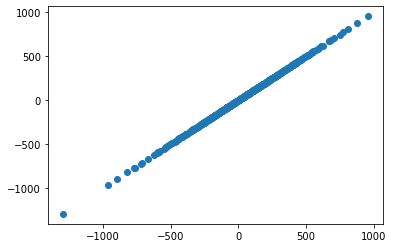

In [6]:
plt.scatter(y_test, y_pred)

# Solve the test

In [30]:
X_sol = pd.read_csv('test.csv')
y_sol = pd.DataFrame()
y_sol['Id'] = X_sol['Id']
X_sol = X_sol.drop(labels='Id', axis=1)
y_sol['y'] = pd.DataFrame(regr.predict(X_sol))

In [31]:
y_sol.to_csv('submission.csv', index=False)